summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5


summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:20:37 PM | Rank 0 | INFO  |  loading from HF_h

2025-10-20 13:20:38.160117: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-10-20 13:20:38.170086: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-10-20 13:20:38.172219: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


🔹 Using Heteroscedastic Gaussian likelihood
🔹 Using Heteroscedastic Gaussian likelihood
🔹 Using Heteroscedastic Gaussian likelihood
truth_uncen = (3, 14) pred = (3, 14), truth = (3, 14)


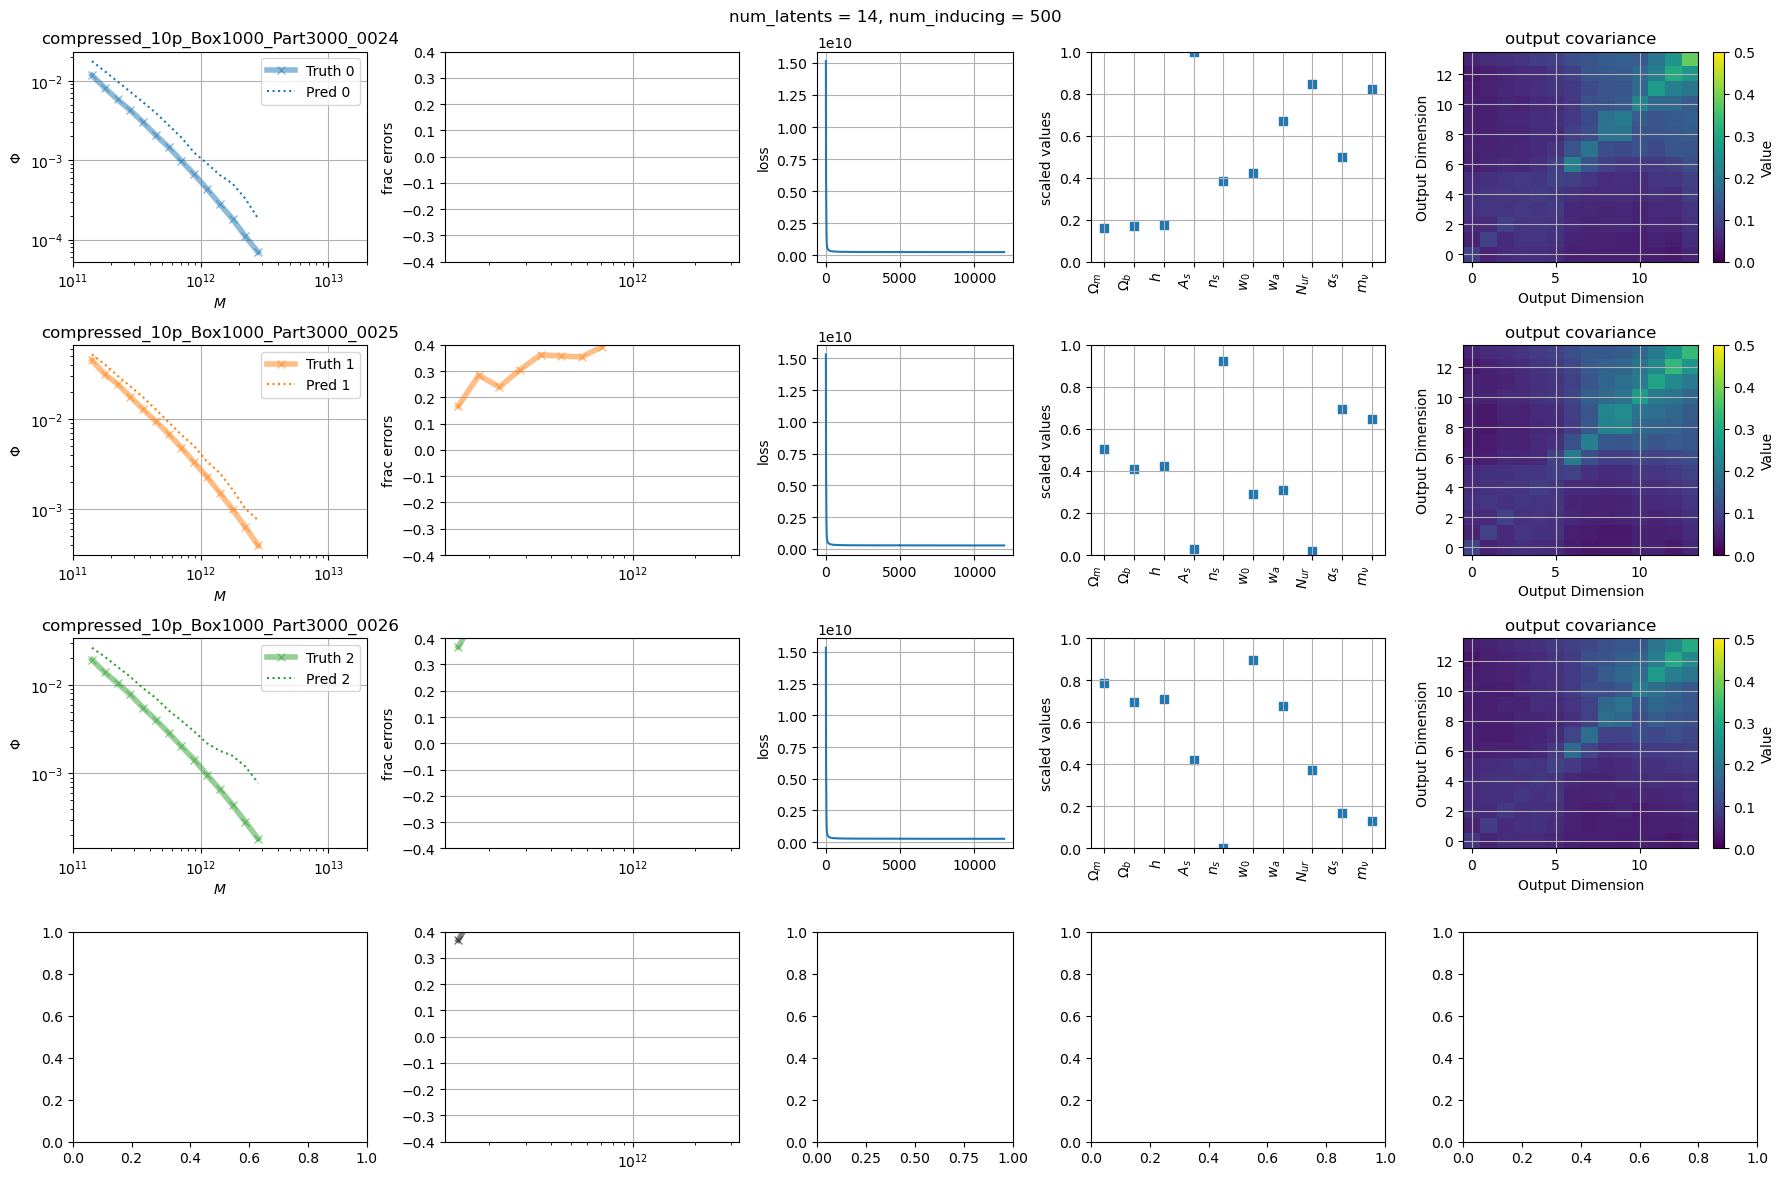

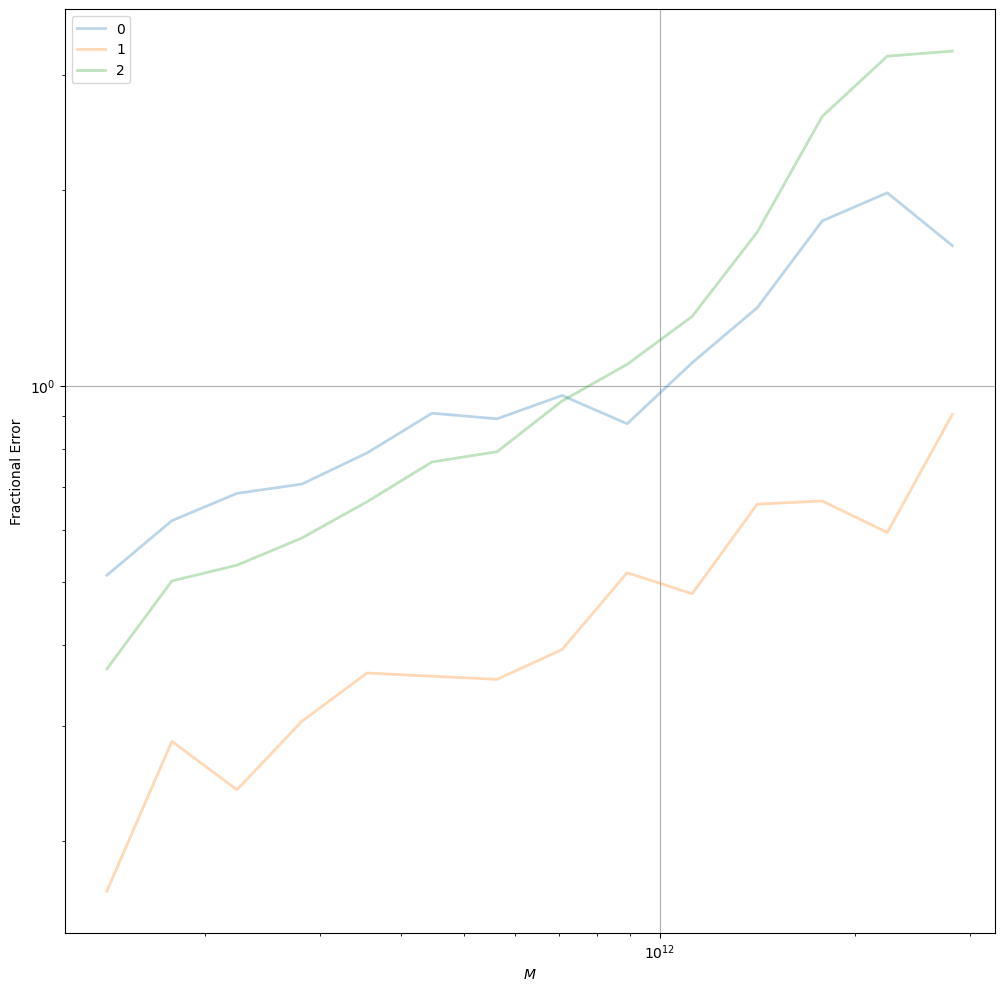

In [2]:
import numpy as np
import importlib
from gal_goku import plot
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/'
train_subdir = 'HMF/train_poisson/'

num_inducing = 500
num_latents = 14
epochs = 12_000
get_counts = True


sims = np.arange(3)


composite_kernel = ['matern32', 'matern52', 'matern32', 'matern52']
norm_type = 'subtract_mean'  # Options could be 'subtract_mean' or 'std_gaussian'

plot_hmf_emu = plot.HmfCombined(sims=sims, data_dir=data_dir, train_subdir=train_subdir, num_inducing=num_inducing, num_latents=num_latents, epochs=epochs, composite_kernel=composite_kernel, norm_type=norm_type, get_counts=get_counts, logging_level='ERROR')



_ = plot_hmf_emu.pred_vs_trtuh()

Something is missing

In [ ]:
plot_hmf_emu._pre

In [3]:
import numpy as np
import importlib
from gal_goku import plot, summary_stats
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/'

hmf = summary_stats.HMF(data_dir=data_dir, fid='L2', z=2.5, narrow=False, logging_level='DEBUG')

In [4]:
mbins, log_hmf, mult_fac, _, _ = hmf.get_data(get_counts=True)

summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/20/2025 01:22:23 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5


In [5]:
mult_fac.shape, mbins.shape, log_hmf.shape

((557, 14), (14,), (557, 14))

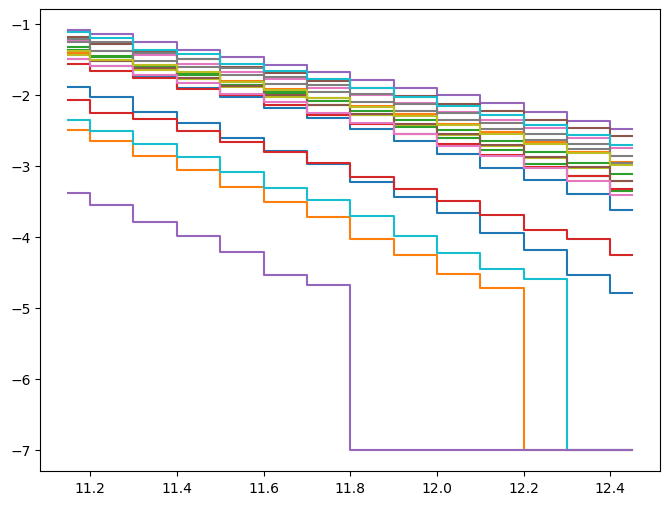

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

ind = np.random.randint(0, log_hmf.shape[0], size=20)
for i in ind:
    ax.plot(mbins, np.log10(np.exp(log_hmf[i])), drawstyle='steps-mid')